### Chapter 3. Test Data:Flattening, Filtering and Chunking

In [1]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# sns.set(rc = {'figure.figsize':(15,8)})

%matplotlib inline 

Example 3-1. Computing n-grams

In [3]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    # windows에서 실행하는 경우 기본 인코딩이 cp949 이므로 encoding 값 지정해야 함.
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [4]:
biz_df = load_json_df('data\yelp_academic_dataset_business.json')
biz_df.shape


(15585, 15)

In [5]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [8]:
js = []
with open('data\yelp_academic_dataset_review.json', encoding = 'utf-8') as f:
  for i in range(10000):
    js.append(json.loads(f.readline()))

In [10]:
review_df = pd.DataFrame(js)
review_df.shape

(10000, 9)

In [11]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [12]:
review_df['text'][0]

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."

> unigrams, bigrams, trigrams에 대한 피쳐 변환기 생성.기본 옵션은 하나의 문자로 된 단어를 무시한다.
<br/>실전에서는 의미없는 단어들을 제거하기 때문에 매우 유용하지만,
<br/>이 예제에서는 설명을 위해 명시적으로 포함시킨다.

In [18]:
# bag of words

In [20]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])
x

<10000x24570 sparse matrix of type '<class 'numpy.int64'>'
	with 694107 stored elements in Compressed Sparse Row format>

In [21]:
words = bow_converter.get_feature_names()
len(words)

C:\Users\INP016\anaconda3\envs\nlp_project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


24570

In [22]:
words[:10]

['0', '00', '000', '00000', '007', '00am', '00pm', '01', '02', '02pm']

In [23]:
# bigrams

In [26]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])
x2

<10000x293936 sparse matrix of type '<class 'numpy.int64'>'
	with 981534 stored elements in Compressed Sparse Row format>

In [27]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

C:\Users\INP016\anaconda3\envs\nlp_project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


293936

In [30]:
bigrams[-10:]

['味の種類は半端なく多いです 50以上はあったはず',
 '夏のうだる暑さには 最高のチョイスだと思います',
 '安い トッピングをしても５ドル以上はいかないはず',
 '总的来说就是又油又咸 吃完了以后要不停喝水',
 '松鼠鱼中规中矩 但卖27块钱也不便宜',
 '毛血旺的大肠好油 酸豆角炒肉沫做的超级咸',
 '没一个好吃的 不适合中国人吃',
 '点了四个菜 没一个好吃的',
 '特に夏のニューオーリンズはジメジメして暑いから 公園に行った後にここでかき氷とか最高だと思う',
 '酸豆角炒肉沫做的超级咸 松鼠鱼中规中矩']

In [32]:
#trigrams

In [34]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])
x3

<10000x689172 sparse matrix of type '<class 'numpy.int64'>'
	with 1007244 stored elements in Compressed Sparse Row format>

In [35]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

C:\Users\INP016\anaconda3\envs\nlp_project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


689172

In [36]:
trigrams[:10]

['0 0 for',
 '0 1 stars',
 '0 10 would',
 '0 23g of',
 '0 25 4',
 '0 25 7',
 '0 25 cent',
 '0 3 is',
 '0 3 miles',
 '0 35 charge']

In [37]:
print(len(words), len(bigrams), len(trigrams))

24570 293936 689172


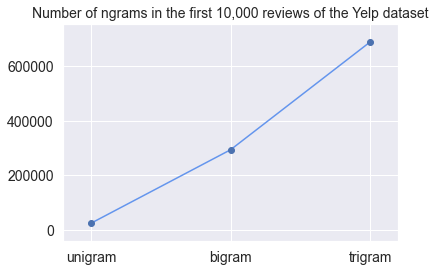

In [56]:

# 그림 3-6
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', fontsize=14)

plt.show()
plt.close()

Example 3-2. PoS tagging and chunking

In [59]:
# 처음 10개의 리뷰 로드
js = []
with open('data\yelp_academic_dataset_review.json', encoding = 'utf-8') as f:
  for i in range(10):
    js.append(json.loads(f.readline()))


review_df = pd.DataFrame(js)
review_df.shape

(10, 9)

### 1.spacy  사용

In [60]:
import spacy

In [66]:
# model meta data
print(spacy.info('en'))


=========================== Info about model 'en' ===========================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

In [67]:
# 언어 모델 로드
nlp = spacy.load('en')

In [68]:
# 데이터 프레임에 적용
doc_df = review_df['text'].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [69]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [70]:
# spacy는 품사(.pos_)와 태그(.tag_)를 모두 제공
for doc in doc_df[4]:
  print(doc.text, doc.pos_, doc.tag_)

Cute ADJ JJ
interior NOUN NN
and CCONJ CC
owner NOUN NN
( PUNCT -LRB-
? PUNCT .
) PUNCT -RRB-
gave VERB VBD
us PRON PRP
tour NOUN NN
of ADP IN
upcoming ADJ JJ
patio NOUN NN
/ SYM SYM
rooftop NOUN NN
area NOUN NN
which DET WDT
will VERB MD
be AUX VB
great ADJ JJ
on ADP IN
beautiful ADJ JJ
days NOUN NNS
like SCONJ IN
today NOUN NN
. PUNCT .
Cheese ADJ JJ
curds NOUN NNS
were AUX VBD
very ADV RB
good ADJ JJ
and CCONJ CC
very ADV RB
filling ADJ JJ
. PUNCT .
Really ADV RB
like VERB VB
that DET DT
sandwiches NOUN NNS
come VERB VBP
w ADV RB
salad NOUN NN
, PUNCT ,
esp ADV RB
after ADP IN
eating VERB VBG
too ADV RB
many ADJ JJ
curds NOUN NNS
! PUNCT .
Had AUX VBD
the DET DT
onion NOUN NN
, PUNCT ,
gruyere PROPN NNP
, PUNCT ,
tomato PROPN NNP
sandwich NOUN NN
. PUNCT .
Was AUX VBD
n't PART RB
too ADV RB
much ADJ JJ
cheese NOUN NN
which DET WDT
I PRON PRP
liked VERB VBD
. PUNCT .
Needed VERB VBN
something PRON NN
else ADV RB
... PUNCT :
pepper NOUN NN
jelly ADV RB
maybe ADV RB
. PUNCT .
Would VER

In [71]:
# spacy는 명사구 추출 기능도 제공한다.
print([chunk for chunk in doc_df[4].noun_chunks])

[Cute interior, owner, us, tour, upcoming patio/rooftop area, beautiful days, today, Cheese curds, that sandwiches, w salad, too many curds, the onion, , tomato sandwich, too much cheese, I, something, more menu options, salads w fun cheeses, Lots, beer, wine, limited cocktails, I, the draft wines]


2.Textblob사용

In [73]:
from textblob import TextBlob

In [74]:
# Textblob 에서는 기본값으로 PatterTagger를 사용하며, 이 예제에서는 이걸로 충분하다.
# NLTK tagger를 사용할 수도 있지만 이것은 불완전한 문장에 대해 더 잘 동작한다.

In [75]:
blob_df = review_df['text'].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [76]:
type(blob_df[4])

textblob.blob.TextBlob

In [79]:
import nltk
nltk.download('averaged_perceptron_tagger')
blob_df[4].tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\INP016\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Cute', 'NNP'),
 ('interior', 'NN'),
 ('and', 'CC'),
 ('owner', 'NN'),
 ('gave', 'VBD'),
 ('us', 'PRP'),
 ('tour', 'NN'),
 ('of', 'IN'),
 ('upcoming', 'VBG'),
 ('patio/rooftop', 'JJ'),
 ('area', 'NN'),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('great', 'JJ'),
 ('on', 'IN'),
 ('beautiful', 'JJ'),
 ('days', 'NNS'),
 ('like', 'IN'),
 ('today', 'NN'),
 ('Cheese', 'JJ'),
 ('curds', 'NNS'),
 ('were', 'VBD'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('and', 'CC'),
 ('very', 'RB'),
 ('filling', 'JJ'),
 ('Really', 'RB'),
 ('like', 'IN'),
 ('that', 'DT'),
 ('sandwiches', 'VBZ'),
 ('come', 'VBP'),
 ('w', 'NN'),
 ('salad', 'NN'),
 ('esp', 'RB'),
 ('after', 'IN'),
 ('eating', 'VBG'),
 ('too', 'RB'),
 ('many', 'JJ'),
 ('curds', 'NNS'),
 ('Had', 'VBD'),
 ('the', 'DT'),
 ('onion', 'NN'),
 ('gruyere', 'RB'),
 ('tomato', 'NN'),
 ('sandwich', 'NN'),
 ('Was', 'JJ'),
 ("n't", 'RB'),
 ('too', 'RB'),
 ('much', 'JJ'),
 ('cheese', 'NN'),
 ('which', 'WDT'),
 ('I', 'PRP'),
 ('liked', 'VBD'),
 ('Needed', '

In [82]:
# Textblob도 명사구 추출 가능
nltk.download('brown')
print([np for np in blob_df[4].noun_phrases])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\INP016\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


['cute', 'patio/rooftop area', 'beautiful days', 'cheese', 'really', 'w salad', 'tomato sandwich', 'was', 'needed', '... pepper', 'menu options', 'salads w fun cheeses', 'lots', 'draft wines']
